In [3]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Download dataset
path = kagglehub.dataset_download("uciml/default-of-credit-card-clients-dataset")

/Users/popthrop/Desktop/DS 340/Final Project/DS340/.venv/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:


# CSV file in the downloaded directory
for file in os.listdir(path):
    if file.endswith(".csv"):
        csv_file = os.path.join(path, file)
        break

df = pd.read_csv(csv_file)

target_vec = df['default.payment.next.month']
feature_vec = df.drop('default.payment.next.month', axis=1)

Baseline Model of Logistic Regression with Cross Validation

In [16]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support

x_train, x_test, y_train, y_test = train_test_split(feature_vec, target_vec, train_size=0.8)

LR_base = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegressionCV(
        cv=5,
        scoring='roc_auc',
        max_iter=5000,
        class_weight='balanced',
        solver="lbfgs",
        n_jobs=-1

    ))
])

LR_base.fit(x_train,y_train)
y_pred = LR_base.predict(x_test)

#Evaluations of all models will be based on AUC Score, Precision, Recall, and F score

precision, recall, fscore, _ = precision_recall_fscore_support(y_test,y_pred)

print(f'AUC Score: {LR_base.score(x_test,y_test)} \nPrecision: {precision} \nRecall: {recall} \n \
F Score: {fscore}')

AUC Score: 0.7254752099150025 
Precision: [0.87160042 0.38465074] 
Recall: [0.71339897 0.63027108] 
 F Score: [0.78460452 0.47773973]


Start to code more advanced ML techniques 

In [ ]:
#Random Forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

parameter_grid = {'n_estimators': [10,100,200,500,1000]}

RF = RandomForestClassifier(n_jobs=-1)
RF_gridsearch = GridSearchCV(RF,param_grid=parameter_grid,scoring='roc_auc',cv=5,n_jobs=-1)

RF_gridsearch.fit(x_train,y_train)

y_pred = RF_gridsearch.predict(x_test)

#Evaluations of all models will be based on AUC Score, Precision, Recall, and F score

precision, recall, fscore, _ = precision_recall_fscore_support(y_test,y_pred)

print(f'AUC Score: {RF_gridsearch.score(x_test,y_test)} \nPrecision: {precision} \nRecall: {recall} \n \
F Score: {fscore}')


AUC Score: 0.7686008114504677 
Precision: [0.84190476 0.66666667] 
Recall: [0.94646681 0.37593985] 
 F Score: [0.89112903 0.48076923]


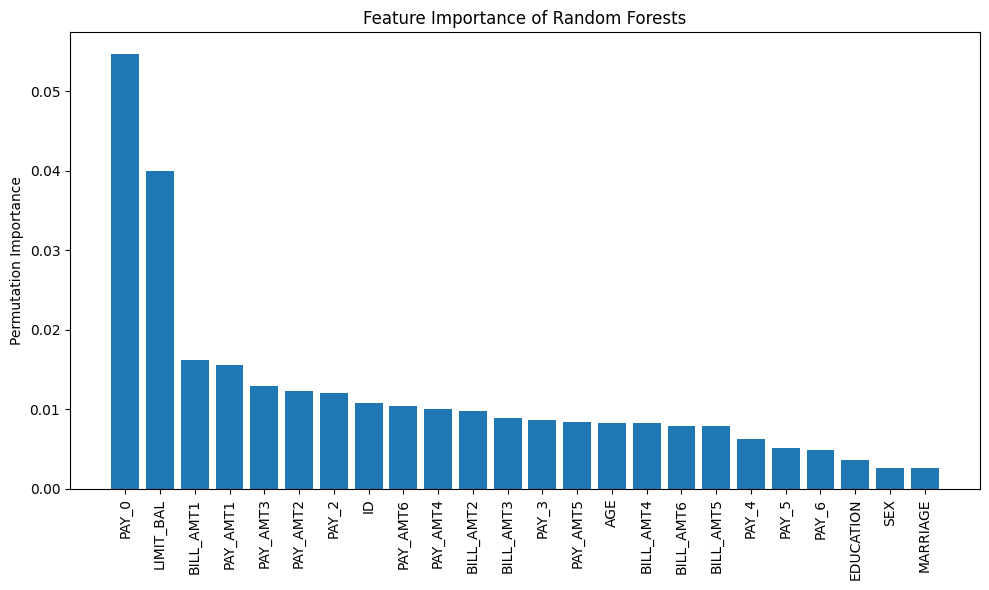

In [24]:
from sklearn.inspection import permutation_importance

result = permutation_importance(RF_gridsearch, x_test, y_test, n_repeats=15)
importances = result.importances_mean
feature_names = feature_vec.columns

sorted = np.argsort(importances)[::-1] 

sorted_features = feature_names[sorted]
sorted_importances = importances[sorted]

plt.figure(figsize=(10, 6))
plt.bar(sorted_features, sorted_importances)
plt.xticks(rotation=90)
plt.ylabel("Permutation Importance")
plt.title("Feature Importance of Random Forests")
plt.tight_layout()
plt.show()